In [124]:
import pandas as pd
import numpy as np

In [125]:
movies = pd.read_csv('TMDB_movie_dataset_v11.csv')

movies.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,1.089245e+06,1.089245e+06,1.089245e+06,1.089245e+06,1.089245e+06,1.089245e+06,1.089245e+06
mean,7.133338e+05,1.951465e+00,1.969028e+01,7.123721e+05,4.875441e+01,2.760321e+05,1.267570e+00
std,3.816165e+05,3.052017e+00,3.253412e+02,1.811655e+07,6.192607e+01,5.033510e+06,7.748145e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00
25%,3.966350e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
50%,7.165950e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,0.000000e+00,6.000000e-01
75%,1.048910e+06,5.000000e+00,1.000000e+00,0.000000e+00,8.900000e+01,0.000000e+00,8.810000e-01
max,1.342411e+06,1.000000e+01,3.449500e+04,3.000000e+09,1.440000e+04,9.000000e+08,2.994357e+03


In [126]:
movies.dtypes

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
dtype: object

In [127]:
movies['release_date'].replace('\\N', np.nan, inplace=True)
movies['release_date'] = pd.to_datetime(movies['release_date'])

/var/folders/j6/8m6mdsb538904m93y9fcnr4h0000gn/T/ipykernel_2383/2100909281.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['release_date'].replace('\\N', np.nan, inplace=True)


In [128]:
#filtering the dataset by release dates within the last 20 years. The max release date has been set to February 2024 so that a released movie can have enough time to realize its potential
movies = movies[(movies['release_date'] >= pd.to_datetime('01-01-2004')) & (movies['release_date'] <= pd.to_datetime('12-31-2023'))]
movies.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [129]:
print(len(movies))
print(max(movies['release_date']))
print(min(movies['release_date']))

561167
2023-12-31 00:00:00
2004-01-01 00:00:00


In [130]:
tmdb_dataset = movies[movies['production_countries'].str.contains('United States of America|United Kingdom', na=False)]


In [131]:
print(max(tmdb_dataset['release_date']))
print(min(tmdb_dataset['release_date']))
print(len(tmdb_dataset))
print(tmdb_dataset['production_countries'].nunique())

2023-12-31 00:00:00
2004-01-01 00:00:00
121587
2547


In [132]:
len(tmdb_dataset)
tmdb_dataset['production_countries'].nunique()

2547

In [133]:
#removing rows with null values

print(len(tmdb_dataset))
tmdb_dataset.dropna()
print(len(tmdb_dataset))

#no null values indicate a very high quality dataset. There are other inconsistencies that we will be on the lookout for
#this will be our master dataframe. Hereon, any operations will be made to copies of this dataframe.

121587
121587


At this point, I will being with the exploratory data analysis. this would involve establishing some general KPIs that will help us understand the movies better

In [134]:
movies_general = tmdb_dataset.copy(deep=True)
print(movies_general.columns)

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')


first KPI : ROI = revenue/budget
an ROI of 1 would indicate a movie that broke even, greater the ROI, the better the movie did

before I calculate the ROI, I need to reiterate that our focus is purely on commercial movies. I need to decide on a minimum budget to further filter the database. For this, I need a higher order view of how the variation of budget looks like with respect to our dataset. I will plot a histogram and boxplot of the budget to understand what the distribution of the column 'budget' looks like.

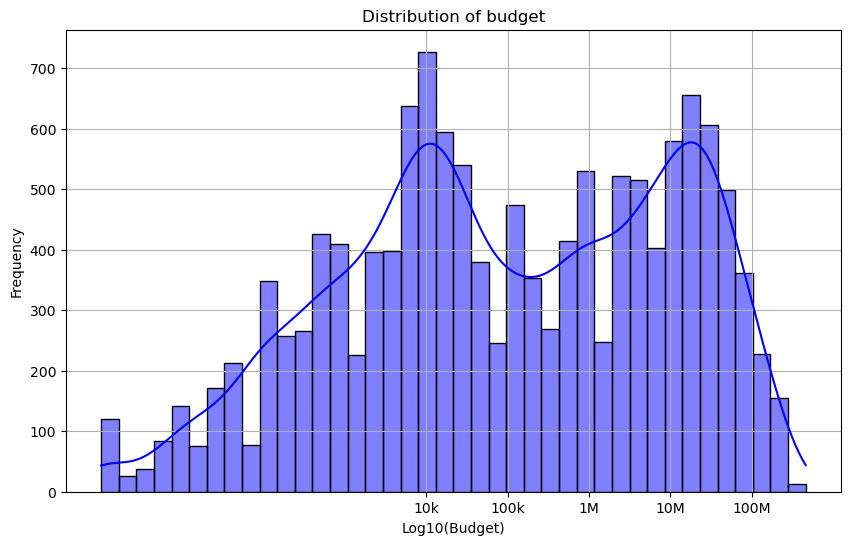

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 0 budget values with NaN, and drop any non-numeric values
budget_data = pd.to_numeric(movies_general['budget'], errors='coerce').replace(0, np.nan).dropna()

# Apply log10 transformation only to non-zero, positive budgets
log_budget_data = np.log10(budget_data)

# Create the histogram with KDE (Kernel Density Estimation)
plt.figure(figsize=(10, 6))
sns.histplot(log_budget_data, bins=40, kde=True, color='blue')

# Set log scale on the x-axis
plt.xlabel('Log10(Budget)')
plt.ylabel('Frequency')
plt.title('Distribution of budget')

# Adding ticks to reflect the true budget values
plt.xticks(ticks=[np.log10(x) for x in [1e4, 1e5, 1e6, 1e7, 1e8]],
           labels=['10k', '100k', '1M', '10M', '100M'])

plt.grid(True)
plt.show()


The two peak distribution we see indicates a bimodial distribution in the dataset. One between 10 million to 100 million likely representing high budget commercial films. Another peak around 10k, which probably represents the genre of independant movies. The gap between the two peaks suggests that there may be fewer mid-budget movies compared to higher or lower budget categories. This indicates a funding gulf in the industry where the producing parties tend to stay away from medium budget movies. It could also indicate that there are two entirely different categories of producers and that the difference between them is significant. It is also evident that the dataset is made up of mostly low budget movies.

The tail on the right side of the histogram also tells use that there are fewer movies with very high budgets but they form a distinctive group, likely representing the most expensive blockbusters. Given our focus on commercial movies, it would seem like a logical choice to filter the movies based on budget greater that an amount that is around 10 million. Given the log scale of the histogram and to preserve datapoints, I think 5 million would be a more apt figure.

In [136]:
#drop rows with budget less than 8 million
movies_general.drop(movies_general[movies_general['budget'] < 15000000].index, inplace=True)

In [137]:
movies_general['roi'] = movies_general['revenue']/movies_general['budget']

In [138]:
#How many data points do we currently have?
len(movies_general)

2509

2509 might seem like a small number, but it is important to remember that there are only so many commercial movies that are released every year. We can still extract a lot of valuable insights from this relatively small subset.

In [139]:
#lets look at how the yearly production of movies looks like
movies_yearly = movies_general.groupby(movies_general['release_date'].dt.year)['id'].count().reset_index()
movies_yearly.rename(columns = {'id':'number of movies','release_date':'year'},inplace=True)
movies_yearly.head()

,year,number of movies
0,2004,145
1,2005,145
2,2006,153
3,2007,151
4,2008,153


In [140]:
print(movies_yearly.dtypes)
print(max(movies_yearly['year']))
print(min(movies_yearly['number of movies']))
print(len(movies_yearly))

year                int32
number of movies    int64
dtype: object
2023
55
20


Text(0.5, 1.0, 'Number of Movies Released Per Year')

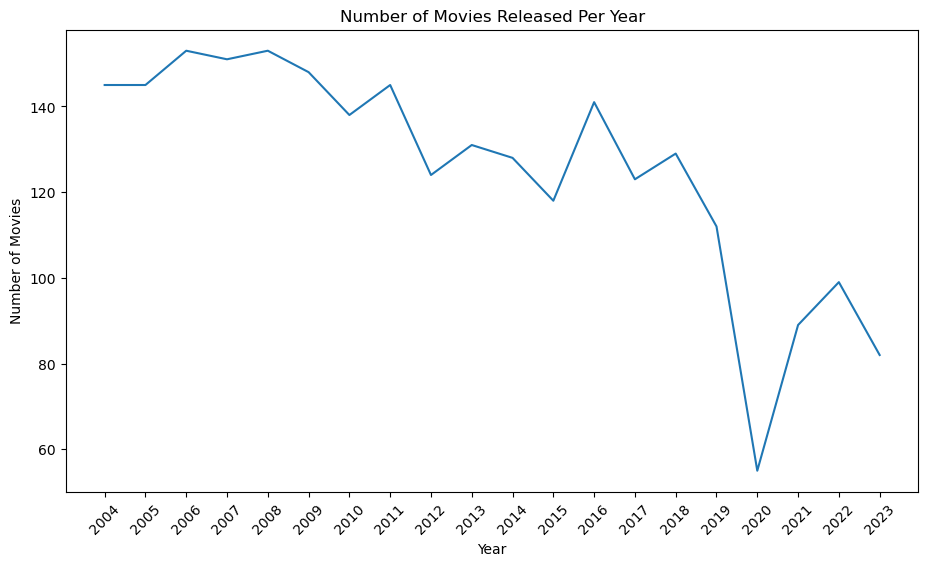

In [141]:
#lets put it on a graph and see what it looks like.
from matplotlib import pyplot as plt
movies_yearly['year'] = movies_yearly['year'].astype(str)
#movies_yearly.drop()
plt.figure(figsize=(11,6))
plt.plot(movies_yearly['year'], movies_yearly['number of movies'])
plt.xticks(ticks=range(len(movies_yearly['year'])), labels=movies_yearly['year'], rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Per Year')


We can see a steady decline in the total number of high budget movies being released every year. The big dip during the year 2020 might indicate the instability caused in this industry due to the COVID-19 pandemic. The pandemic was catastrophic for the movie business, movie theaters being shut down took away the primary revenue from movie releases and it forced production houses to explore alternative delivery methods like online streaming services. 

Lets see how the average budget was affected during the same timeframe.

In [142]:
budget_yearly = movies_general.groupby(movies_general['release_date'].dt.year)['budget'].mean().reset_index()
budget_yearly.rename(columns = {'budget':'annual investment','release_date':'year'},inplace=True)
budget_yearly.head()

print(budget_yearly.dtypes)
print(max(budget_yearly['year']))
print(min(budget_yearly['annual investment']))
print(len(budget_yearly))

year                   int32
annual investment    float64
dtype: object
2023
48480816.99346405
20


Text(0.5, 1.0, 'Mean annual investment per year')

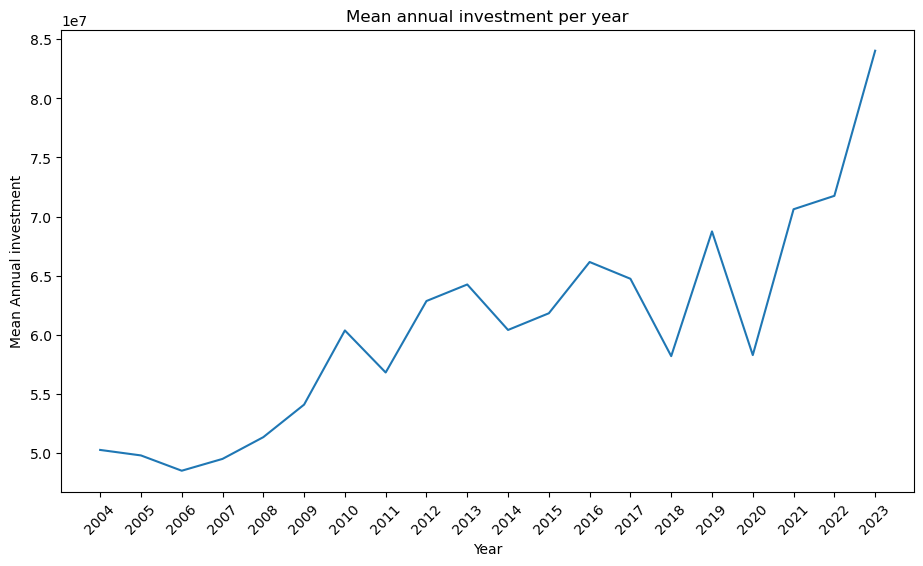

In [143]:
#lets put it on a graph and see what it looks like.
budget_yearly['year'] = budget_yearly['year'].astype(str)
#budget_yearly.drop()
plt.figure(figsize=(11,6))
plt.plot(budget_yearly['year'], budget_yearly['annual investment'])
plt.xticks(ticks=range(len(budget_yearly['year'])), labels=budget_yearly['year'], rotation=45)
plt.xlabel('Year')
plt.ylabel('Mean Annual investment')
plt.title('Mean annual investment per year')


There it is! annual budget took a huge hit in 2020 although it recovered quickly, a finding which is in line with the previous graph showing a decline in movie releases in 2019. But, the investment in high budget movies has been higher than ever!

At this point, lets take a look at the dataset again.

In [144]:
movies_general.dtypes

id                               int64
title                           object
vote_average                   float64
vote_count                       int64
status                          object
release_date            datetime64[ns]
revenue                          int64
runtime                          int64
adult                             bool
backdrop_path                   object
budget                           int64
homepage                        object
imdb_id                         object
original_language               object
original_title                  object
overview                        object
popularity                     float64
poster_path                     object
tagline                         object
genres                          object
production_companies            object
production_countries            object
spoken_languages                object
keywords                        object
roi                            float64
dtype: object

In [145]:
movies_general.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,roi
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",5.159580
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",4.252904
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",5.430046
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",12.336312
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",6.903707


In [146]:
movies_with_year = movies_general.copy(deep=True)
movies_with_year['release_year'] = movies_with_year['release_date'].dt.year

max_roi_per_year = movies_with_year.loc[movies_with_year.groupby('release_year')['roi'].idxmax()]

result = max_roi_per_year[['release_year', 'original_title','genres','popularity', 'budget', 'revenue', 'production_companies', 'roi']]

result.head(20)



,release_year,original_title,genres,popularity,budget,revenue,production_companies,roi
1064,2004,The Passion of the Christ,Drama,43.729,30000000,611899420,Icon Productions,20.396647
1764,2005,The Exorcism of Emily Rose,"Crime, Drama, Horror, Thriller",30.068,19000000,145166804,"Lakeshore Entertainment, Firm Films, Screen Gems",7.640358
848,2006,Borat: Cultural Learnings of America for Make ...,Comedy,18.823,18000000,262552893,"20th Century Fox, Everyman Pictures, Dune Ente...",14.586272
1715,2007,Mr. Bean's Holiday,"Family, Comedy",22.843,25000000,232225908,"Tiger Aspect, Working Title Films",9.289036
275,2008,Slumdog Millionaire,"Drama, Romance",22.969,15000000,378410542,"Celador Films, Film4 Productions",25.227369
362,2009,The Twilight Saga: New Moon,"Adventure, Fantasy, Drama, Romance",43.688,50000000,709827462,"Summit Entertainment, Temple Hill Entertainmen...",14.196549
390,2010,The King's Speech,"Drama, History",29.833,15000000,414211549,"The Weinstein Company, UK Film Council, Moment...",27.614103
950,2011,Bad Teacher,Comedy,21.898,20000000,216197492,"Columbia Pictures, Mosaic Media Group",10.809875
212,2012,Silver Linings Playbook,"Drama, Comedy, Romance",28.014,21000000,236412453,The Weinstein Company,11.257736
249,2013,Despicable Me 2,"Animation, Comedy, Family",46.283,76000000,970761885,"Illumination, Universal Pictures",12.773183


Not the list you were expecting? It is important to remember that this is a list showing highest roi, which is a ratio that is subjective to each movie. In other words, the roi does necessarily correlate with profit or popularity. To take a look at the profitability of the movie, we need to look at profit.
profit  = revenue - budget

In [147]:
movies_with_year_2 = movies_general.copy(deep=True)
movies_with_year_2['release_year'] = movies_with_year_2['release_date'].dt.year
movies_with_year_2['profit'] = movies_with_year_2['revenue'] - movies_with_year_2['budget']

max_roi_per_year_2 = movies_with_year_2.loc[movies_with_year_2.groupby('release_year')['profit'].idxmax()]

result_2 = max_roi_per_year_2[['release_year', 'original_title','genres','popularity', 'budget', 'revenue', 'production_companies', 'roi','profit']]

result_2.head(20)

,release_year,original_title,genres,popularity,budget,revenue,production_companies,roi,profit
213,2004,Shrek 2,"Animation, Family, Comedy, Fantasy, Adventure",82.153,150000000,928760770,"DreamWorks Pictures, Pacific Data Images, Drea...",6.191738,778760770
46,2005,Harry Potter and the Goblet of Fire,"Adventure, Fantasy",134.276,150000000,895921036,"Warner Bros. Pictures, Heyday Films, Patalex I...",5.972807,745921036
109,2006,Pirates of the Caribbean: Dead Man's Chest,"Adventure, Fantasy, Action",69.403,200000000,1065659812,"Walt Disney Pictures, Jerry Bruckheimer Films,...",5.328299,865659812
58,2007,Harry Potter and the Order of the Phoenix,"Adventure, Fantasy",117.168,150000000,938212738,"Warner Bros. Pictures, Heyday Films",6.254752,788212738
2,2008,The Dark Knight,"Drama, Action, Crime, Thriller",130.643,185000000,1004558444,"DC Comics, Legendary Pictures, Syncopy, Isobel...",5.430046,819558444
3,2009,Avatar,"Action, Adventure, Fantasy, Science Fiction",79.932,237000000,2923706026,"Dune Entertainment, Lightstorm Entertainment, ...",12.336312,2686706026
138,2010,Toy Story 3,"Animation, Family, Comedy",69.145,200000000,1066969703,"Pixar, Walt Disney Pictures",5.334849,866969703
48,2011,Harry Potter and the Deathly Hallows: Part 2,"Fantasy, Adventure",110.974,125000000,1341511219,"Warner Bros. Pictures, Heyday Films",10.732090,1216511219
4,2012,The Avengers,"Science Fiction, Action, Adventure",98.082,220000000,1518815515,Marvel Studios,6.903707,1298815515
101,2013,Frozen,"Animation, Family, Adventure, Fantasy",85.794,150000000,1274219009,"Walt Disney Pictures, Walt Disney Animation St...",8.494793,1124219009


That is a more recognizable list, isn't it?

Lets include the feature 'profit' in the primary dataframe.

In [148]:
movies_general['profit'] = movies_general['revenue'] - movies_general['budget']

Lets generate a list of most popular movies as well.

In [149]:
movies_with_year_popularity = movies_general.copy(deep=True)
movies_with_year_popularity['release_year'] = movies_with_year_popularity['release_date'].dt.year

max_pop_per_year = movies_with_year_popularity.loc[movies_with_year_popularity.groupby('release_year')['popularity'].idxmax()]

result_popularity = max_pop_per_year[['release_year', 'original_title','genres','popularity', 'budget', 'revenue', 'production_companies', 'roi','profit']]

result_popularity.head(20)

,release_year,original_title,genres,popularity,budget,revenue,production_companies,roi,profit
38,2004,Harry Potter and the Prisoner of Azkaban,"Adventure, Fantasy",124.386,130000000,789804554,"Warner Bros. Pictures, 1492 Pictures, Heyday F...",6.075420,659804554
46,2005,Harry Potter and the Goblet of Fire,"Adventure, Fantasy",134.276,150000000,895921036,"Warner Bros. Pictures, Heyday Films, Patalex I...",5.972807,745921036
109,2006,Pirates of the Caribbean: Dead Man's Chest,"Adventure, Fantasy, Action",69.403,200000000,1065659812,"Walt Disney Pictures, Jerry Bruckheimer Films,...",5.328299,865659812
58,2007,Harry Potter and the Order of the Phoenix,"Adventure, Fantasy",117.168,150000000,938212738,"Warner Bros. Pictures, Heyday Films",6.254752,788212738
2,2008,The Dark Knight,"Drama, Action, Crime, Thriller",130.643,185000000,1004558444,"DC Comics, Legendary Pictures, Syncopy, Isobel...",5.430046,819558444
59,2009,Harry Potter and the Half-Blood Prince,"Adventure, Fantasy",121.735,250000000,933959197,"Warner Bros. Pictures, Heyday Films",3.735837,683959197
65,2010,Harry Potter and the Deathly Hallows: Part 1,"Adventure, Fantasy",111.984,250000000,954305868,"Warner Bros. Pictures, Heyday Films",3.817223,704305868
48,2011,Harry Potter and the Deathly Hallows: Part 2,"Fantasy, Adventure",110.974,125000000,1341511219,"Warner Bros. Pictures, Heyday Films",10.732090,1216511219
4,2012,The Avengers,"Science Fiction, Action, Adventure",98.082,220000000,1518815515,Marvel Studios,6.903707,1298815515
22,2013,The Wolf of Wall Street,"Crime, Drama, Comedy",97.444,100000000,392000000,"EMJAG Productions, Red Granite Pictures, Appia...",3.920000,292000000


Lets see if and how popularity, roi and/or profit are related, lets do a quick correlation analysis of roi and profit with popularity

In [150]:
correlation = result_2[['profit', 'popularity']].corr().iloc[0, 1]

print(f"The correlation between popularity and profit is: {correlation}")

correlation = result_2[['roi','popularity']].corr().iloc[0, 1]

print(f"The correlation between popularity and roi is: {correlation}")


The correlation between popularity and profit is: 0.07327407215987193
The correlation between popularity and roi is: 0.301451100026909


For the most profitable movies grouped by year, popularity shows no significant correlation with profit but shows a significant correlation with roi. Although there are several potential biases that might be affecting these results, the positive correlation is good to know.

Lets look at the same correlation numbers from our primary dataframe.

In [151]:
correlation = movies_general[['profit', 'popularity']].corr().iloc[0, 1]

print(f"The correlation between popularity and profit is: {correlation}")

correlation = movies_general[['roi','popularity']].corr().iloc[0, 1]

print(f"The correlation between popularity and roi is: {correlation}")

The correlation between popularity and profit is: 0.14515390144947407
The correlation between popularity and roi is: 0.10779530777067557


Although, both are positive numbers. A correlation coefficient < 0.3 is not considered to be significant. This tells us that on a global scale, there is no significant linear correlation of popularity with profit and roi. This does not disqualify the existence of a non linear correlation.

Lets go back to the most profitable movies by year.

In [152]:
result_2.head(20)

,release_year,original_title,genres,popularity,budget,revenue,production_companies,roi,profit
213,2004,Shrek 2,"Animation, Family, Comedy, Fantasy, Adventure",82.153,150000000,928760770,"DreamWorks Pictures, Pacific Data Images, Drea...",6.191738,778760770
46,2005,Harry Potter and the Goblet of Fire,"Adventure, Fantasy",134.276,150000000,895921036,"Warner Bros. Pictures, Heyday Films, Patalex I...",5.972807,745921036
109,2006,Pirates of the Caribbean: Dead Man's Chest,"Adventure, Fantasy, Action",69.403,200000000,1065659812,"Walt Disney Pictures, Jerry Bruckheimer Films,...",5.328299,865659812
58,2007,Harry Potter and the Order of the Phoenix,"Adventure, Fantasy",117.168,150000000,938212738,"Warner Bros. Pictures, Heyday Films",6.254752,788212738
2,2008,The Dark Knight,"Drama, Action, Crime, Thriller",130.643,185000000,1004558444,"DC Comics, Legendary Pictures, Syncopy, Isobel...",5.430046,819558444
3,2009,Avatar,"Action, Adventure, Fantasy, Science Fiction",79.932,237000000,2923706026,"Dune Entertainment, Lightstorm Entertainment, ...",12.336312,2686706026
138,2010,Toy Story 3,"Animation, Family, Comedy",69.145,200000000,1066969703,"Pixar, Walt Disney Pictures",5.334849,866969703
48,2011,Harry Potter and the Deathly Hallows: Part 2,"Fantasy, Adventure",110.974,125000000,1341511219,"Warner Bros. Pictures, Heyday Films",10.732090,1216511219
4,2012,The Avengers,"Science Fiction, Action, Adventure",98.082,220000000,1518815515,Marvel Studios,6.903707,1298815515
101,2013,Frozen,"Animation, Family, Adventure, Fantasy",85.794,150000000,1274219009,"Walt Disney Pictures, Walt Disney Animation St...",8.494793,1124219009


Lets expand this list by including the top three most profitable movies per year.

In [153]:
top3 = movies_general.copy(deep=True)

# Extract release year
top3['release_year'] = top3['release_date'].dt.year

# Group by release year and get the top 3 most profitable movies per year
top_3_roi_per_year = top3.groupby('release_year').apply(lambda x: x.nlargest(3, 'profit')).reset_index(drop=True)

# Select relevant columns
result_3 = top_3_roi_per_year[['release_year', 'original_title', 'genres', 'popularity', 'budget', 'revenue', 'production_companies', 'roi', 'profit']]

# Display the result
result_3.tail(10)




/var/folders/j6/8m6mdsb538904m93y9fcnr4h0000gn/T/ipykernel_2383/4076698217.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_roi_per_year = top3.groupby('release_year').apply(lambda x: x.nlargest(3, 'profit')).reset_index(drop=True)


,release_year,original_title,genres,popularity,budget,revenue,production_companies,roi,profit
50,2020,Tenet,"Action, Thriller, Science Fiction",44.025,205000000,365304105,"Warner Bros. Pictures, Syncopy",1.781971,160304105
51,2021,Spider-Man: No Way Home,"Action, Adventure, Science Fiction",186.065,200000000,1921847111,"Marvel Studios, Pascal Pictures, Columbia Pict...",9.609236,1721847111
52,2021,F9,"Action, Adventure, Crime",48.986,200000000,726229501,"Original Film, One Race, Perfect Storm Enterta...",3.631148,526229501
53,2021,No Time to Die,"Action, Thriller, Romance",51.295,250000000,774153007,"Eon Productions, Metro-Goldwyn-Mayer, Universa...",3.096612,524153007
54,2022,Avatar: The Way of Water,"Science Fiction, Adventure, Action",241.285,460000000,2320250281,"20th Century Studios, Lightstorm Entertainment",5.044022,1860250281
55,2022,Top Gun: Maverick,"Action, Drama",126.291,170000000,1488732821,"Skydance, Don Simpson/Jerry Bruckheimer Films,...",8.757252,1318732821
56,2022,Minions: The Rise of Gru,"Animation, Comedy, Family",81.377,85000000,939628210,"Universal Pictures, Illumination",11.054450,854628210
57,2023,Barbie,"Comedy, Adventure, Fantasy",1069.340,145000000,1428545028,"LuckyChap Entertainment, Heyday Films, NB/GG P...",9.852035,1283545028
58,2023,The Super Mario Bros. Movie,"Animation, Family, Adventure, Fantasy, Comedy",410.411,100000000,1355725263,"Universal Pictures, Illumination, Nintendo",13.557253,1255725263
59,2023,Oppenheimer,"Drama, History",463.384,100000000,933700000,"Syncopy, Universal Pictures, Atlas Entertainment",9.337000,833700000


Lets do a frequency analysis of the production companies

In [154]:
top_3_movies_by_year_profit = result_3.copy(deep=True)
top_3_movies_by_year_profit['production_companies'] = top_3_movies_by_year_profit['production_companies'].apply(lambda x: x.split(','))

production_company = top_3_movies_by_year_profit.explode('production_companies')

production_company = production_company.rename(columns={'production_companies': 'company_name'})

frequency_analysis = production_company['company_name'].value_counts().reset_index()

frequency_analysis.head(5)


,company_name,count
0,Walt Disney Pictures,8
1,Universal Pictures,8
2,Warner Bros. Pictures,8
3,Heyday Films,7
4,Marvel Studios,7


/var/folders/j6/8m6mdsb538904m93y9fcnr4h0000gn/T/ipykernel_2383/2640348112.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='company_name', data=top_10_freq_df, palette='viridis')


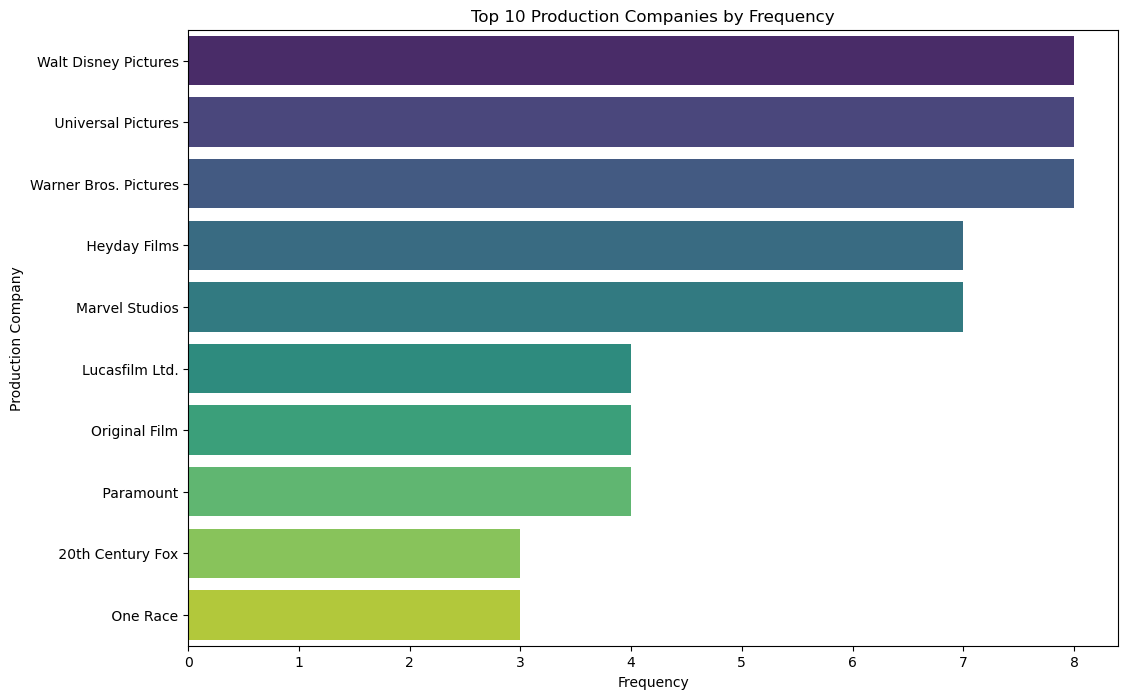

In [155]:
freq_df = frequency_analysis
freq_df.columns = ['company_name', 'frequency']

# Get the top 10 production companies by frequency
top_10_freq_df = freq_df.nlargest(10, 'frequency')

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='company_name', data=top_10_freq_df, palette='viridis')
plt.title('Top 10 Production Companies by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Production Company')
plt.show()

this give us a list of top 10 production companies involved in production of the most profitable movies in the past 20 years. I know that Marvel is owned by Disney, but I will abstain from using outside information in the decision making flow for this analysis.

Lets do the same frequency analysis based on genres.

In [156]:
top_3_movies_by_year_genre = result_3.copy(deep=True)
top_3_movies_by_year_genre['genres'] = top_3_movies_by_year_genre['genres'].apply(lambda x: x.split(','))

genres = top_3_movies_by_year_genre.explode('genres')

genres = genres.rename(columns={'genres': 'genre'})

frequency_analysis_2 = genres['genre'].value_counts().reset_index()

frequency_analysis_2.head(5)


,genre,count
0,Adventure,27
1,Fantasy,19
2,Action,19
3,Adventure,17
4,Science Fiction,16


/var/folders/j6/8m6mdsb538904m93y9fcnr4h0000gn/T/ipykernel_2383/489382171.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='genre', data=top_10_freq_df, palette='viridis')


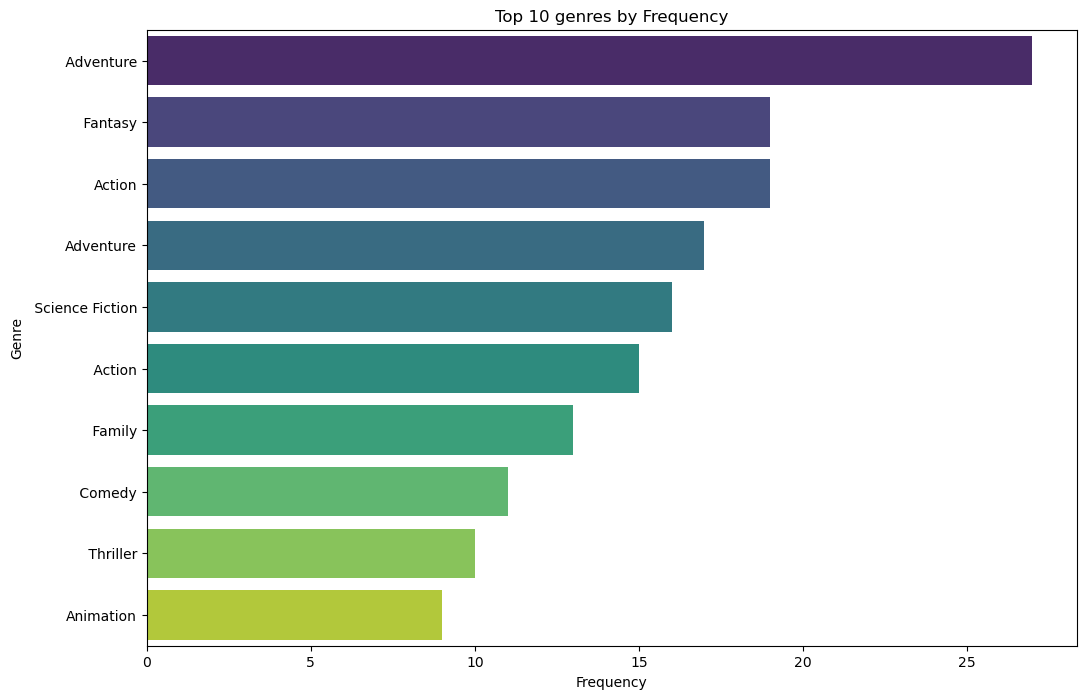

In [157]:
freq_df = frequency_analysis_2
freq_df.columns = ['genre', 'frequency']

# Get the top 10 production companies by frequency
top_10_freq_df = freq_df.nlargest(10, 'frequency')

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='genre', data=top_10_freq_df, palette='viridis')
plt.title('Top 10 genres by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()

It seems like adventure is by far the most profitable genre, closely followed by fantasy and Action.
Now that I have a higher level view of how the dataset looks like, I will delve into a fine grained analysis of the dataset. The objective of this analysis is to see how the movie industry is doing. That involves looking at the performance of its key players. Lets go back to the list of most profitable production houses.

In [158]:
frequency_analysis.head(5)

,company_name,frequency
0,Walt Disney Pictures,8
1,Universal Pictures,8
2,Warner Bros. Pictures,8
3,Heyday Films,7
4,Marvel Studios,7


I intend to see how these companies are doing and in what genres are they seeing the most success. I would like to start with one of my favourite media houses, Universal Pictures.
We will begin by filtering our dataset by the production house.

In [159]:
movies_universal = movies_general[movies_general['production_companies'].str.contains('Universal Pictures', case=False, na=False)]
print(len(movies_universal))
movies_universal.head()

237


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,roi,profit
30,16869,Inglourious Basterds,8.215,20746,Released,2009-08-19,321457747,153,False,/8pEnePgGyfUqj8Qa6d91OZQ6Aih.jpg,...,59.162,/7sfbEnaARXDDhKm0CZ7D7uc2sbo.jpg,Once upon a time in Nazi occupied France...,"Drama, Thriller, War","The Weinstein Company, Universal Pictures, A B...","France, Germany, United States of America","German, English, French, Italian","guerrilla warfare, swastika, paris, france, na...",4.592254,251457747
44,135397,Jurassic World,6.682,19414,Released,2015-06-06,1671537444,124,False,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,...,54.089,/A0LZHXUzo5C60Oahvt7VxvwuzHw.jpg,The park is open.,"Action, Adventure, Science Fiction, Thriller","Amblin Entertainment, Universal Pictures",United States of America,English,"island, primal fear, escape, velociraptor, dna...",11.143583,1521537444
131,20352,Despicable Me,7.227,14147,Released,2010-07-08,533679475,95,False,/euCnMxNRlHNxA4f9BMnWbmxPOse.jpg,...,47.416,/b1BT309QWjtFUlJPLmXmrcHOWEL.jpg,Superbad. Superdad.,"Family, Animation, Comedy","Illumination, Universal Pictures",United States of America,English,"parent child relationship, orphanage, adoptive...",7.734485,464679475
202,72105,Ted,6.407,11513,Released,2012-06-29,549368315,107,False,/wS9TiAS1WckeTS2IrFg5dRN9WQD.jpg,...,38.480,/1QVZXQQHCEIj8lyUhdBYd2qOYtq.jpg,Ted is coming.,"Comedy, Fantasy","Universal Pictures, MRC, Fuzzy Door Production...",United States of America,English,"friendship, dream, love, buddy, teddy bear, to...",10.987366,499368315
249,93456,Despicable Me 2,6.916,10523,Released,2013-06-26,970761885,98,False,/4UvNG6JFaSzMLUXUsq62VcVjNhP.jpg,...,46.283,/5Fh4NdoEnCjCK9wLjdJ9DJNFl2b.jpg,Back 2 Work,"Animation, Comedy, Family","Illumination, Universal Pictures",United States of America,English,"parent child relationship, adoptive father, se...",12.773183,894761885


Lets look at how Universal Pictures is doing in terms of profitability and popularity. We will consider the sum of all profits for profitability and the mean of popularity.

/var/folders/j6/8m6mdsb538904m93y9fcnr4h0000gn/T/ipykernel_2383/2398948500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_universal['release_year'] = movies_universal['release_date'].dt.year


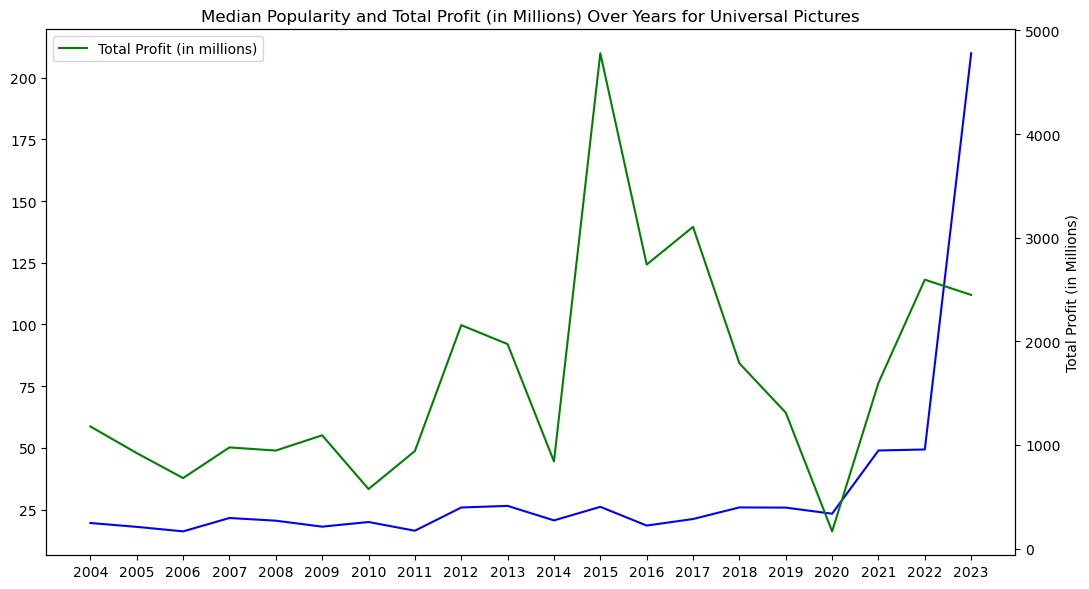

In [160]:
# Group by year, calculate the median of popularity and sum of profit
movies_universal['release_year'] = movies_universal['release_date'].dt.year
grouped_data = movies_universal.groupby('release_year').agg({
    'popularity': 'median',  # Using median instead of mean
    'profit': 'sum'
}).reset_index()

# Convert release_year to string for plotting
grouped_data['release_year'] = grouped_data['release_year'].astype(str)

# Adjust profit to be in millions
grouped_data['profit'] = grouped_data['profit'] / 1_000_000

# Create the figure and first plot for popularity
plt.figure(figsize=(11, 6))

# Plot popularity on the first y-axis
plt.plot(grouped_data['release_year'], grouped_data['popularity'], color='blue', label='Median Popularity')

# Create a secondary axis for profit
ax2 = plt.twinx()

# Plot profit (in millions) on the secondary y-axis
ax2.plot(grouped_data['release_year'], grouped_data['profit'], color='green', label='Total Profit (in millions)')

# Customize the plot
plt.xticks(ticks=range(len(grouped_data['release_year'])), labels=grouped_data['release_year'], rotation=45)
plt.xlabel('Year')
plt.title('Median Popularity and Total Profit (in Millions) Over Years for Universal Pictures')

# Set y-axis labels
ax2.set_ylabel('Total Profit (in Millions)')

# Add legends and labels
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Looking at this graph, here are a few insights we can draw for Universal Pictures:

Popularity Stability: The median popularity remains relatively stable from 2004 to around 2019. It fluctuates slightly but does not show significant growth or decline. However, there is a noticeable spike in popularity after 2020, reaching its peak around 2023.

Profit Variability: The total profit shows much more fluctuation than popularity. Notably, there is a major spike in total profit in 2015, indicating that something significant (likely a few very successful films) drove unusually high profits that year.

Decline and Rebound: There is a clear dip in total profit from 2016 to 2020, hitting a low point around 2020. This drop is likely tied to the impact of the COVID-19 pandemic, where theaters were closed and film releases were delayed. Interestingly, after 2020, there is a rapid rebound in profit, peaking again in 2023, possibly due to the resumption of normal business, high-grossing blockbusters, and the rise of streaming platforms.

Mismatch between Popularity and Profit: The trends in popularity and profit don’t exactly match. For instance, the massive profit spike in 2015 doesn’t correspond to a major change in popularity, suggesting that profitability might be driven by a few high-budget, high-earning films rather than overall median popularity. Similarly, while popularity peaks in 2023, profit also rises but does not follow an exact pattern with popularity increases.

Lets do the same analysis for Walt Disney Studios and Marvel

/var/folders/j6/8m6mdsb538904m93y9fcnr4h0000gn/T/ipykernel_2383/1376758473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_disney['release_year'] = movies_disney['release_date'].dt.year


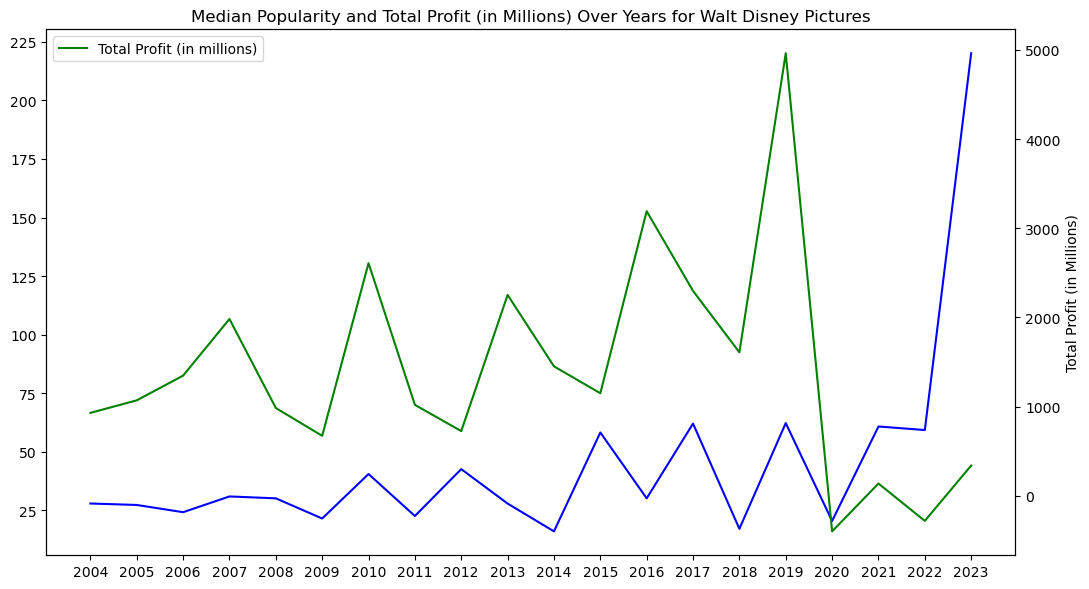

In [161]:
movies_disney = movies_general[movies_general['production_companies'].str.contains('Walt Disney Pictures', case=False, na=False)]
# Group by year, calculate the median of popularity and sum of profit
movies_disney['release_year'] = movies_disney['release_date'].dt.year
grouped_data = movies_disney.groupby('release_year').agg({
    'popularity': 'median',  # Using median instead of mean
    'profit': 'sum'
}).reset_index()

# Convert release_year to string for plotting
grouped_data['release_year'] = grouped_data['release_year'].astype(str)

# Adjust profit to be in millions
grouped_data['profit'] = grouped_data['profit'] / 1_000_000

# Create the figure and first plot for popularity
plt.figure(figsize=(11, 6))

# Plot popularity on the first y-axis
plt.plot(grouped_data['release_year'], grouped_data['popularity'], color='blue', label='Median Popularity')

# Create a secondary axis for profit
ax2 = plt.twinx()

# Plot profit (in millions) on the secondary y-axis
ax2.plot(grouped_data['release_year'], grouped_data['profit'], color='green', label='Total Profit (in millions)')

# Customize the plot
plt.xticks(ticks=range(len(grouped_data['release_year'])), labels=grouped_data['release_year'], rotation=45)
plt.xlabel('Year')
plt.title('Median Popularity and Total Profit (in Millions) Over Years for Walt Disney Pictures')

# Set y-axis labels
ax2.set_ylabel('Total Profit (in Millions)')

# Add legends and labels
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Key Insights:
General Profit Trends: The total profit has fluctuated significantly. Major spikes are visible around 2010, 2016, 2019, and a dramatic peak in 2023. However, there are also noticeable drops in 2008, 2012, and especially 2020, where the profit appears to nearly collapse (possibly due to the COVID-19 pandemic's impact on cinema).

Popularity Trends: Median popularity seems relatively stable but lower than total profit. The peaks of popularity are less pronounced compared to profit. The highest points of popularity are around 2016, 2019, and 2023, which coincide with some of the profit spikes but with less variability.

2020 Impact: There is a sharp drop in both total profit and median popularity around 2020, likely due to the global pandemic shutting down theaters and delaying film releases.

/var/folders/j6/8m6mdsb538904m93y9fcnr4h0000gn/T/ipykernel_2383/3673986717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_marvel['release_year'] = movies_marvel['release_date'].dt.year


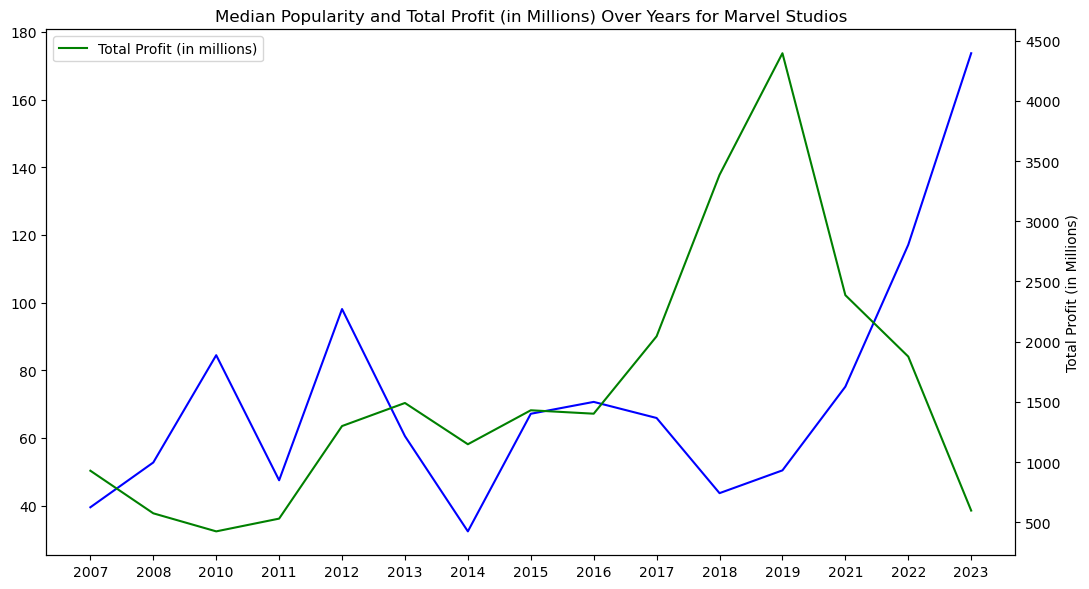

In [162]:
movies_marvel = movies_general[movies_general['production_companies'].str.contains('Marvel Studios', case=False, na=False)]
# Group by year, calculate the median of popularity and sum of profit
movies_marvel['release_year'] = movies_marvel['release_date'].dt.year
grouped_data = movies_marvel.groupby('release_year').agg({
    'popularity': 'median',  # Using median instead of mean
    'profit': 'sum'
}).reset_index()

# Convert release_year to string for plotting
grouped_data['release_year'] = grouped_data['release_year'].astype(str)

# Adjust profit to be in millions
grouped_data['profit'] = grouped_data['profit'] / 1_000_000

# Create the figure and first plot for popularity
plt.figure(figsize=(11, 6))

# Plot popularity on the first y-axis
plt.plot(grouped_data['release_year'], grouped_data['popularity'], color='blue', label='Median Popularity')

# Create a secondary axis for profit
ax2 = plt.twinx()

# Plot profit (in millions) on the secondary y-axis
ax2.plot(grouped_data['release_year'], grouped_data['profit'], color='green', label='Total Profit (in millions)')

# Customize the plot
plt.xticks(ticks=range(len(grouped_data['release_year'])), labels=grouped_data['release_year'], rotation=45)
plt.xlabel('Year')
plt.title('Median Popularity and Total Profit (in Millions) Over Years for Marvel Studios')

# Set y-axis labels
ax2.set_ylabel('Total Profit (in Millions)')

# Add legends and labels
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Key Insights:
Initial Growth (2007-2012): Both popularity and profit show gradual growth during the early stages of the Marvel Cinematic Universe (MCU). Notable peaks occur around 2010, when Marvel’s influence started to expand with films like Iron Man 2 and The Avengers.

Popularity and Profit Peaks (2018-2019): Marvel experiences major spikes in both profit and popularity, particularly in 2018 and 2019. These years coincide with the release of some of the MCU's highest-grossing films, such as Avengers: Infinity War and Avengers: Endgame. The green line shows a sharp peak in profits during this period, indicating blockbuster successes.

Drop During 2020: Like the Disney graph, both metrics drop sharply in 2020, likely due to the COVID-19 pandemic, which disrupted film releases and closed theaters worldwide.

Sharp Recovery (2021-2023): From 2021 onward, there's a sharp increase in both popularity and profit, with profits peaking around 2021-2022 before declining in 2023. Popularity, however, shows a steady upward trend and reaches its highest point in 2023, suggesting strong fan engagement despite the slight profit drop.

Although there are production houses that have historically generated greater profits, the most stable of the three big names seems to be Universal Pictures. This could be because they exhibhit a diverse expertise in genres that helps them in remaining relatively immune to market fluctuations.